<a href="https://colab.research.google.com/github/tanner-k/ECON488_Project/blob/main/DD_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries needed to do the analysis for the project
import pandas as pd
import numpy as np

In [2]:
#Read in the data for the project
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
14474,2020-11-20,Virginia,51,213331,3912
14475,2020-11-20,Washington,53,147251,2738
14476,2020-11-20,West Virginia,54,38480,639
14477,2020-11-20,Wisconsin,55,365190,3106


In [4]:
#Create a variable for the list of states we want to include in our analysis. 
included_states = ['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'West Virginia']

In [5]:
#Keep only the states we want to include in our analysis
df = df.loc[df.state.isin(included_states)]

#Organize the data by state and by date
df = df.sort_values(by=['state', 'date'],ascending=[True, True])

In [6]:
#Create daily counts of cases and deaths
df['daily_cases'] = df.groupby(by='state')['cases'].diff().fillna(0)
df['daily_deaths'] = df.groupby(by='state')['deaths'].diff().fillna(0)

#Eliminate negative values from transitioning from state to state
df[df['daily_cases'] < 0] = 0
df[df['daily_deaths'] < 0] = 0

df.loc[df.state=='New York'].describe()

,fips,cases,deaths,daily_cases,daily_deaths
count,261.0,261.000000,261.000000,261.000000,261.000000
mean,36.0,356702.360153,25844.260536,2247.521073,129.513410
std,0.0,154562.473031,11282.469648,2619.908351,244.197581
min,36.0,1.000000,0.000000,0.000000,0.000000
25%,36.0,326659.000000,25028.000000,667.000000,9.000000
50%,36.0,404207.000000,31979.000000,1006.000000,20.000000
75%,36.0,449658.000000,32639.000000,2715.000000,97.000000
max,36.0,589605.000000,33696.000000,12274.000000,1036.000000


In [7]:
#Create a week variable
df['date'] = pd.to_datetime(df['date'])
df['week_of_year'] = df.date.dt.strftime('%U').astype('int32')

In [8]:
#Collapse the data into counts per week
cases = df.groupby(['state', 'week_of_year'])['daily_cases','daily_deaths'].sum()
cases = pd.DataFrame(data=cases)
cases = cases.rename(columns={'daily_cases': 'weekly_cases', 'daily_deaths': 'weekly_deaths'})
cases = cases.reset_index(level=['state', 'week_of_year'])
cases = cases.drop(axis=0, index=0)
cases.loc[cases.state=='Arizona'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,week_of_year,weekly_cases,weekly_deaths
count,43.000000,43.000000,43.000000
mean,25.000000,6805.139535,149.186047
std,12.556539,7449.722595,145.743783
min,4.000000,0.000000,0.000000
25%,14.500000,1350.000000,50.000000
50%,25.000000,3577.000000,120.000000
75%,35.500000,9231.500000,189.000000
max,46.000000,25375.000000,575.000000


In [9]:
#Import mask mandate data
mask = pd.read_csv('https://raw.githubusercontent.com/tanner-k/DD-COVID19/master/Mask_Mandate_Data.csv')
mask.head()

,State,Mask Mandate,Week Number
0,Alabama,0,1
1,Alabama,0,2
2,Alabama,0,3
3,Alabama,0,4
4,Alabama,0,5


In [10]:
#Make the mask data have the same columns as the case data
mask = mask.rename(columns={'State': 'state', 'Week Number': 'week_of_year', 'Mask Mandate': 'mask_mandate'})
mask['weeks'] = mask.week_of_year
mask['State'] = mask.state
mask

,state,mask_mandate,week_of_year,weeks,State
0,Alabama,0,1,1,Alabama
1,Alabama,0,2,2,Alabama
2,Alabama,0,3,3,Alabama
3,Alabama,0,4,4,Alabama
4,Alabama,0,5,5,Alabama
...,...,...,...,...,...
2543,Wyoming,0,48,48,Wyoming
2544,Wyoming,0,49,49,Wyoming
2545,Wyoming,0,50,50,Wyoming
2546,Wyoming,0,51,51,Wyoming


In [11]:
mask = mask.set_index(['state', 'week_of_year'])
cases = cases.set_index(['state', 'week_of_year'])

In [12]:
#Combine the mask mandate data with the cases data
cases = cases.combine_first(mask)
cases

State  mask_mandate  weekly_cases  weekly_deaths  weeks
state   week_of_year                                                           
Alabama 1             Alabama           0.0           NaN            NaN    1.0
        2             Alabama           0.0           NaN            NaN    2.0
        3             Alabama           0.0           NaN            NaN    3.0
        4             Alabama           0.0           NaN            NaN    4.0
        5             Alabama           0.0           NaN            NaN    5.0
...                       ...           ...           ...            ...    ...
Wyoming 48            Wyoming           0.0           NaN            NaN   48.0
        49            Wyoming           0.0           NaN            NaN   49.0
        50            Wyoming           0.0           NaN            NaN   50.0
        51            Wyoming           0.0           NaN            NaN   51.0
        52            Wyoming           0.0           NaN            NaN   52.0

[2548 rows x 5 columns]

In [13]:
cases['mandate_week'] = 0
cases.loc[cases.mask_mandate==1, 'mandate_week'] = cases.loc[cases.mask_mandate==1, 'weeks']
cases.describe()

,mask_mandate,weekly_cases,weekly_deaths,weeks,mandate_week
count,2548.000000,1883.000000,1883.000000,2548.000000,2548.000000
mean,0.013344,6292.813064,134.490175,26.500000,0.350078
std,0.114765,10502.885483,328.524082,15.011277,3.104117
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,674.000000,12.000000,13.750000,0.000000
50%,0.000000,2878.000000,52.000000,26.500000,0.000000
75%,0.000000,6880.000000,130.500000,39.250000,0.000000
max,1.000000,85025.000000,6624.000000,52.000000,46.000000


In [14]:
for states, week in cases.groupby(level=0):
  cases.loc[cases.State==states, 'mandate_week'] = week.mandate_week.max()

cases = cases.dropna()

In [15]:
cases['week_diff'] = cases.loc[cases.mandate_week!=0, 'weeks'].subtract(cases.mandate_week)
cases.week_diff.fillna(0, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
#Import linearmodels library to do the two-way fixed effects regression
while True:
  try:
    from linearmodels import PanelOLS
    break
  except ModuleNotFoundError:
    !pip install linearmodels

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
#Choose the outcome variable(y) and the features(x) for the model
y = cases.weekly_deaths
x = cases.week_diff

In [22]:
#Create the model and fit the data to it
mod = PanelOLS(y, x, entity_effects=True, time_effects=True, drop_absorbed=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PanelOLS Estimation Summary                           
Dep. Variable:          weekly_deaths   R-squared:                        0.0115
Estimator:                   PanelOLS   R-squared (Between):             -0.0834
No. Observations:                1883   R-squared (Within):              -0.0199
Date:                Sun, Nov 22 2020   R-squared (Overall):             -0.0429
Time:                        04:50:40   Log-likelihood                -1.321e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.777
Entities:                          49   P-value                           0.0000
Avg Obs:                       38.429   Distribution:                  F(1,1790)
Min Obs:                       36.000                                           
Max Obs:                       44.000   F-statistic (robust):             4.1287
                            

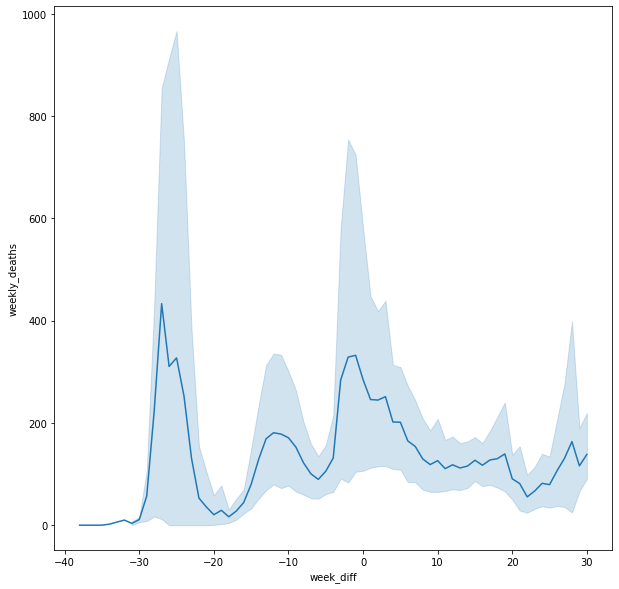

In [19]:
#Create a graph that shows the variation of cases 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.lineplot(x=cases.loc[cases.mandate_week!=0,'week_diff'], y=y, data=cases, )

In [20]:
cases = cases[['weekly_cases', 'weekly_deaths', 'mask_mandate', 'week_diff']]

cases.describe()

,weekly_cases,weekly_deaths,mask_mandate,week_diff
count,1883.000000,1883.000000,1883.000000,1883.000000
mean,6292.813064,134.490175,0.018056,0.661179
std,10502.885483,328.524082,0.133190,10.806083
min,0.000000,0.000000,0.000000,-38.000000
25%,674.000000,12.000000,0.000000,-4.000000
50%,2878.000000,52.000000,0.000000,0.000000
75%,6880.000000,130.500000,0.000000,7.000000
max,85025.000000,6624.000000,1.000000,30.000000


                       weekly_cases  weekly_deaths  mask_mandate  week_diff
state    week_of_year                                                      
Illinois 45                 85025.0          600.0           0.0       27.0
